In [1]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"  # Arrange GPU devices starting from 0
os.environ["CUDA_VISIBLE_DEVICES"]= "0"  # Set the GPU 2 to use

In [2]:
from tensorflow import keras
mnist = keras.datasets.mnist
mnist.load_data()

2024-05-22 20:33:31.245777: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-22 20:33:31.497429: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-22 20:33:31.497462: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-22 20:33:31.501014: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-22 20:33:31.618563: I tensorflow/core/platform/cpu_feature_g

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [3]:
((train_images, train_labels),(test_images, test_labels)) = mnist.load_data()
train_images = train_images / 255
test_images = test_images / 255

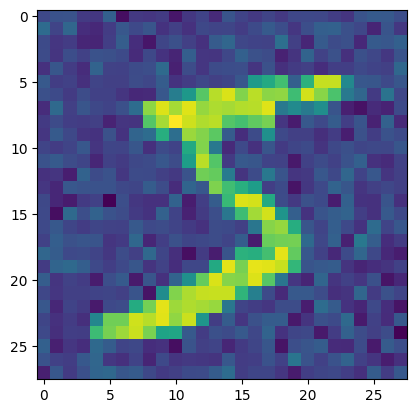

In [4]:
import numpy as np
import matplotlib.pyplot as plt
noize_train_images = train_images + np.random.normal(0.5,0.1,train_images.shape)
noize_test_images = test_images + np.random.normal(0.5,0.1,test_images.shape)
plt.imshow(noize_train_images[0])
plt.show()

In [5]:
min(noize_train_images[0].reshape(-1))

0.1949479637820017

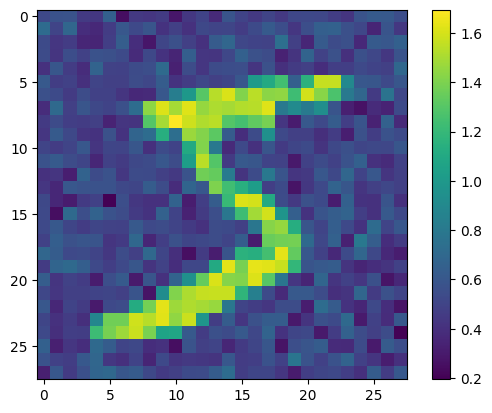

In [6]:
plt.imshow(noize_train_images[0])
plt.colorbar()
plt.show()

In [7]:
noize_train_images[noize_train_images>1] = 1
noize_test_images[noize_test_images>1] = 1

noize_train_images[noize_train_images<0] = 0
noize_test_images[noize_test_images<0] = 0

In [8]:
print(min(noize_train_images[0].reshape(-1)))
print(max(noize_train_images[0].reshape(-1)))

0.1949479637820017
1.0


In [9]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

In [10]:
print(train_labels[:3])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [11]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
tf.config.list_physical_devices('GPU')
# tf.debugging.set_log_device_placement(False)

Num GPUs Available:  1


2024-05-22 20:33:50.907492: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-22 20:33:51.004163: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-22 20:33:51.004362: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [12]:
from keras.layers import Conv2D, Flatten, Dense, Input, MaxPool2D, Lambda, Concatenate
from keras.models import Model
from tensorflow.nn import local_response_normalization

input = Input(shape=(28,28,1))
h1_1_1=Conv2D(16,(5,5),activation='relu')(input)
h1_2_1=Conv2D(16,(5,5),activation='relu')(input)
h1_1_2=MaxPool2D((2,2))(h1_1_1)
h1_2_2=MaxPool2D((2,2))(h1_2_1)
h1_1_3=Lambda(local_response_normalization)(h1_1_2)
h1_2_3=Lambda(local_response_normalization)(h1_2_2)

h2=Concatenate()([h1_1_3,h1_2_3])
h2_1_1=Conv2D(24,(3,3),activation='relu')(h2)
h2_2_1=Conv2D(24,(3,3),activation='relu')(h2)

h3_1_1=Conv2D(24,(3,3),activation='relu')(h2_1_1)
h3_2_1=Conv2D(24,(3,3),activation='relu')(h2_2_1)

d1_1_1=Concatenate()([h3_1_1,h3_2_1])
d1_1_2=Flatten()(d1_1_1)
d1_1_3=Dense(30,activation='relu')(d1_1_2)
d1_2_3=Dense(30,activation='relu')(d1_1_2)

d2_1_1=Concatenate()([d1_1_3,d1_2_3])
d2_1_2=Flatten()(d2_1_1)
d2_1_3=Dense(10, activation='softmax')(d2_1_2)

model = Model(input, d2_1_3)
print(model.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 28, 28, 1)]          0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 24, 24, 16)           416       ['input_1[0][0]']             
                                                                                                  
 conv2d_1 (Conv2D)           (None, 24, 24, 16)           416       ['input_1[0][0]']             
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 12, 12, 16)           0         ['conv2d[0][0]']              
 D)                                                                                           

2024-05-22 20:33:52.609648: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-22 20:33:52.609903: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-22 20:33:52.610089: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-22 20:33:52.744198: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-22 20:33:52.744394: I tensorflow/compile

In [13]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [55]:
model.fit(noize_train_images, train_labels, validation_data=(noize_test_images, test_labels), epochs=5, verbose=2)

Epoch 1/5
1875/1875 - 29s - loss: 0.0203 - accuracy: 0.9934 - val_loss: 0.0555 - val_accuracy: 0.9858 - 29s/epoch - 15ms/step
Epoch 2/5
1875/1875 - 27s - loss: 0.0159 - accuracy: 0.9948 - val_loss: 0.0541 - val_accuracy: 0.9865 - 27s/epoch - 14ms/step
Epoch 3/5
1875/1875 - 32s - loss: 0.0126 - accuracy: 0.9956 - val_loss: 0.0555 - val_accuracy: 0.9871 - 32s/epoch - 17ms/step
Epoch 4/5
1875/1875 - 33s - loss: 0.0114 - accuracy: 0.9962 - val_loss: 0.0566 - val_accuracy: 0.9882 - 33s/epoch - 18ms/step
Epoch 5/5
1875/1875 - 37s - loss: 0.0111 - accuracy: 0.9962 - val_loss: 0.0519 - val_accuracy: 0.9872 - 37s/epoch - 20ms/step


In [16]:
print(len(model.layers))

19


(5, 25)


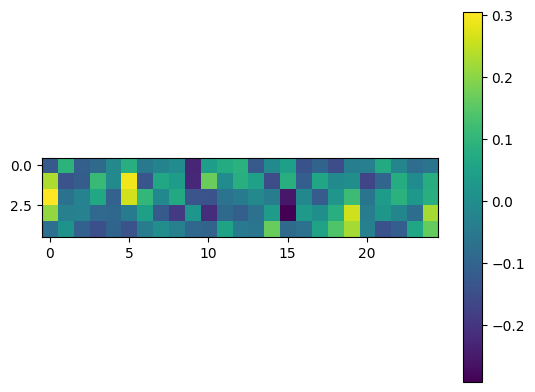

In [56]:
print(model.layers[1].get_weights()[0][:,:,0,5:10].transpose((1,0,2)).reshape(5,-1).shape)
plt.imshow(model.layers[1].get_weights()[0][:,:,0,5:10].transpose((1,0,2)).reshape(5,-1))
plt.colorbar()
plt.show()

(5, 25)


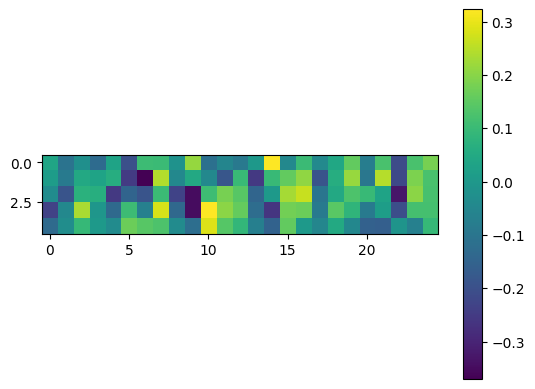

In [57]:
print(model.layers[2].get_weights()[0][:,:,0,5:10].transpose((1,0,2)).reshape(5,-1).shape)
plt.imshow(model.layers[2].get_weights()[0][:,:,0,5:10].transpose((1,0,2)).reshape(5,-1))
plt.colorbar()
plt.show()

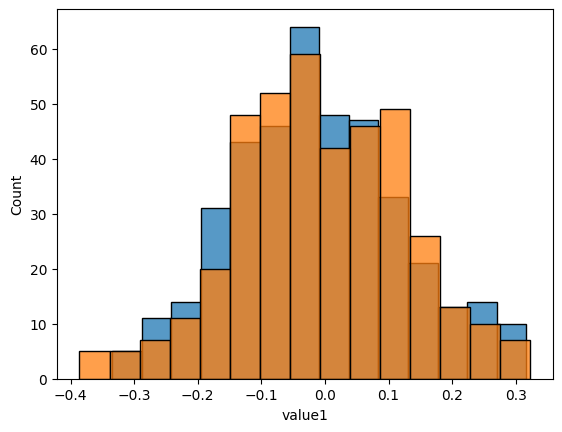

In [58]:
import pandas as pd
import seaborn as sns
df = pd.DataFrame({"value1": model.layers[1].get_weights()[0][:,:,0,:].reshape(-1), "value2": model.layers[2].get_weights()[0][:,:,0,:].reshape(-1)})

sns.histplot(x="value1", data=df)
sns.histplot(x="value2", data=df)
plt.show()

<Axes: xlabel='value', ylabel='Count'>

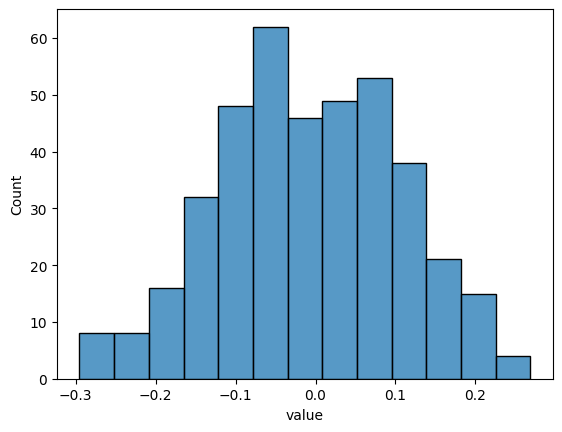

In [42]:
import pandas as pd
import seaborn as sns
df = pd.DataFrame({"value": model.layers[2].get_weights()[0][:,:,0,:].reshape(-1)})
sns.histplot(x="value", data=df)